## Overview of the Calculation of the `z` Parameter

### Introduction

The calculation of the acceleration parameter $(z)$ is critical when performing acceleration searches for binary pulsars. The $z$ parameter allows us to account for the smearing of a pulsar’s frequency due to its orbital motion. This is especially important when searching for pulsars in compact binary systems. 

The following equations are used in the calculation:

### Equation 2.10: Calculation of \(a \sin(i)\)
The projected semi-major axis of the pulsar’s orbit, \( a \sin(i) \), is calculated using:

\[
a \sin(i) = \frac{k_2 \cdot P_{\text{orb}}}{2 \pi \cdot q}
\]

Where:
- \( k_2 \) is the semi-amplitude of the companion's radial velocity (in m/s).
- \( P_{\text{orb}} \) is the orbital period (in seconds).
- \( q \) is the mass ratio of the system.

### Equation 2.9: Frequency Derivative \( \dot{f} \)
The frequency derivative \( \dot{f} \), representing the rate of change of the pulsar’s spin frequency, is given by:

\[
\dot{f} = f_{\text{spin}} \cdot \frac{4 \pi^2 \cdot a \cdot \sin(i)}{c \cdot P_{\text{orb}}^2} \cdot \sin\left(\frac{2 \pi (t - t_{\text{asc}})}{P_{\text{orb}}}\right)
\]

Where:
- \( f_{\text{spin}} \) is the spin frequency of the pulsar (in Hz).
- \( a \sin(i) \) is the projected semi-major axis (calculated using Equation 2.10).
- \( P_{\text{orb}} \) is the orbital period of the pulsar (in seconds).
- \( t \) is the current time (in seconds).
- \( t_{\text{asc}} \) is the time of ascending node (in seconds).
- \( c \) is the speed of light (in m/s).

### Equation 2.11: Calculation of \( z \)
Finally, the acceleration parameter \( z \) is calculated using:

\[
z = \dot{f} \cdot T_{\text{obs}}^2
\]

Where:
- \( \dot{f} \) is the frequency derivative (calculated using Equation 2.9).
- \( T_{\text{obs}} \) is the observation duration (in seconds)

In [1]:
import numpy as np

def calculate_z(f_spin, k2, P_orb, q, t, t_asc, T_obs):
    """
    Calculate the z parameter using equations 2.9, 2.10, and 2.11.
    
    Parameters:
    f_spin (float): The spin frequency of the pulsar (Hz).
    k2 (float): The semi-amplitude of the companion's radial velocity (m/s).
    P_orb (float): The orbital period (seconds).
    q (float): The mass ratio of the system.
    t (float): Current time (seconds).
    t_asc (float): Time of ascending node (seconds).
    T_obs (float): Length of observation (seconds).
    
    Returns:
    float: The calculated z value.
    """
    c = 299792458 # Speed of light (m/s)
    
    a_sin_i = (k2 * P_orb) / (2 * np.pi * q)
    
    f_dot = f_spin * (4 * np.pi**2 * a_sin_i) / (c * P_orb**2) * np.sin(2 * np.pi * (t - t_asc) / P_orb)
    
    z = f_dot * T_obs**2
    
    return z

In [2]:
# Example usage
f_spin = 4000  # Spin frequency in Hz
k2 =  190300 # semi-amplitude of radial velocity in m/s
P_orb = 59454.432  # Orbital period in seconds (~16.67 hours)
q = 0.61  # Mass ratio of the system
t = 1800  # Example current time in seconds (e.g., 30 minutes into the observation)
t_asc = 0  # Time of ascending node 
T_obs = 3600  # Observation length in seconds (1 hour)

z_value = calculate_z(f_spin, k2, P_orb, q, t, t_asc, T_obs)
print(f"The calculated z value is: {z_value}")

The calculated z value is: 1077.9401430504536


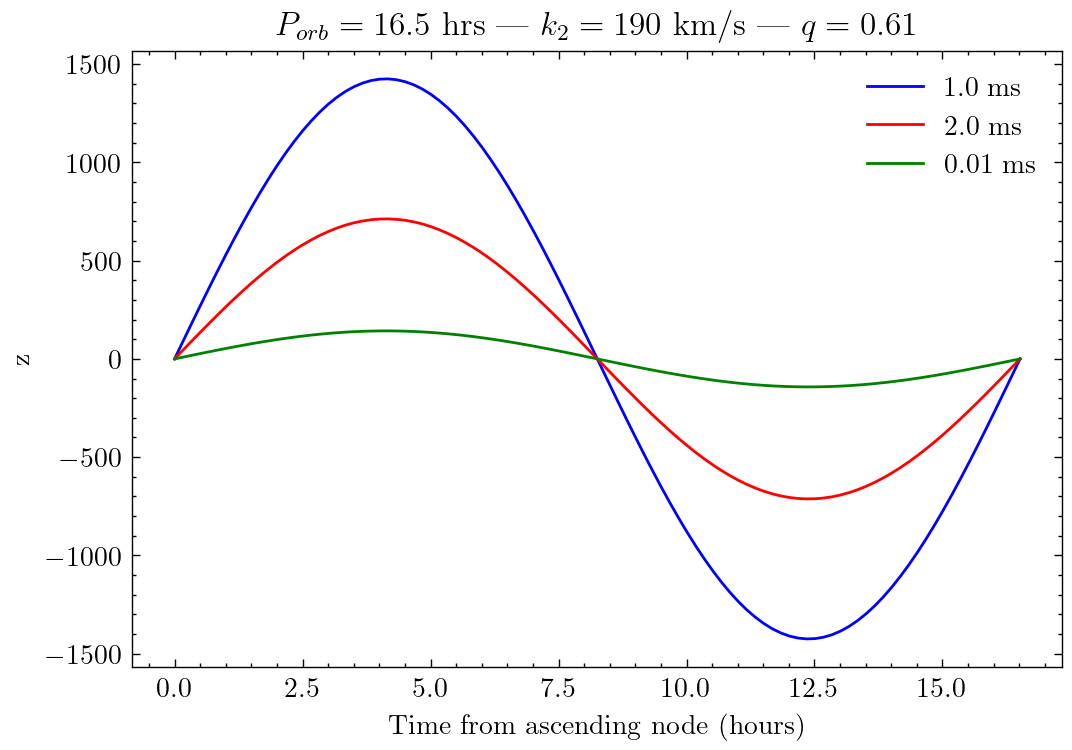

In [26]:
import matplotlib.pyplot as plt
import scienceplots; plt.style.use('science')

z_values = []; z_values2 = []; z_values3 = []
times = []

f_val1 = 1000; f_val2 = 500; f_val3 = 100

for t in np.linspace(0, P_orb, 100):
    z1 = calculate_z(f_val1, k2, P_orb, q, t, t_asc, T_obs)
    z_values.append(z1)

    z2 = calculate_z(f_val2, k2, P_orb, q, t, t_asc, T_obs)
    z_values2.append(z2)

    z3 = calculate_z(f_val3, k2, P_orb, q, t, t_asc, T_obs)
    z_values3.append(z3)
    
    times.append(t/3600)


plt.figure(figsize=(6, 4), dpi=200)
plt.plot(times, z_values, 'b', label=f"{1000/f_val1}" ' ms')
plt.plot(times, z_values2, 'r', label=f"{1000/f_val2}" ' ms')
plt.plot(times, z_values3, 'g', label=f"{1/f_val3}" ' ms')
plt.xlabel('Time from ascending node (hours)')
plt.ylabel('z')
plt.title('$P_{orb} = 16.5$ hrs | $k_2 = 190$ km/s | $q = 0.61$')
plt.legend()